In [4]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
og_df = pd.read_csv('./Unprocessed Datasets/filt_GlobalTemperatures.csv')
og_df.rename(columns={'LandAverageTemperature': 'LandAvgTemp'}, inplace=True)
og_df.drop(og_df.filter(regex="Unname"), axis=1, inplace=True)
fullDf = og_df.copy()
og_df = og_df.head(10)
og_df

,dt,LandAvgTemp
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573
5,1750-06-01,12.937
6,1750-07-01,15.868
7,1750-08-01,14.750
8,1750-09-01,11.413
9,1750-10-01,6.367


In [6]:
# Generate Random NaNs in the dataframe
df = og_df.copy()
ix = [(row, 1) for row in range(df.shape[0]) for col in range(df.shape[1])]
for row, col in random.sample(ix, int(round(0.2*len(ix)))):
    df.iat[row, 1] = np.nan
df

,dt,LandAvgTemp
0,1750-01-01,3.034
1,1750-02-01,NaN
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,NaN
5,1750-06-01,12.937
6,1750-07-01,15.868
7,1750-08-01,NaN
8,1750-09-01,NaN
9,1750-10-01,6.367


In [7]:
# Filling method
newdf = df.interpolate()
if newdf["LandAvgTemp"].isnull().values.any():
    newdf = newdf.fillna(method='bfill')
newdf

,dt,LandAvgTemp
0,1750-01-01,3.0340
1,1750-02-01,4.3300
2,1750-03-01,5.6260
3,1750-04-01,8.4900
4,1750-05-01,10.7135
5,1750-06-01,12.9370
6,1750-07-01,15.8680
7,1750-08-01,12.7010
8,1750-09-01,9.5340
9,1750-10-01,6.3670


In [8]:
newset2 = df.fillna(method='ffill')
if newset2["LandAvgTemp"].isnull().values.any():
    newset2 = newset2.fillna(method='bfill')
newset2

,dt,LandAvgTemp
0,1750-01-01,3.034
1,1750-02-01,3.034
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,8.490
5,1750-06-01,12.937
6,1750-07-01,15.868
7,1750-08-01,15.868
8,1750-09-01,15.868
9,1750-10-01,6.367


In [9]:
newset3 = df.fillna(method='bfill')
if newset3["LandAvgTemp"].isnull().values.any():
    newset3 = newset3.fillna(method='ffill')
newset3

,dt,LandAvgTemp
0,1750-01-01,3.034
1,1750-02-01,5.626
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,12.937
5,1750-06-01,12.937
6,1750-07-01,15.868
7,1750-08-01,6.367
8,1750-09-01,6.367
9,1750-10-01,6.367


In [10]:
# Mean
meanFill = df.fillna(value=df["LandAvgTemp"].mean())
meanFill

,dt,LandAvgTemp
0,1750-01-01,3.034000
1,1750-02-01,8.720333
2,1750-03-01,5.626000
3,1750-04-01,8.490000
4,1750-05-01,8.720333
5,1750-06-01,12.937000
6,1750-07-01,15.868000
7,1750-08-01,8.720333
8,1750-09-01,8.720333
9,1750-10-01,6.367000


In [11]:
# Median
medianFill = df.fillna(value=df["LandAvgTemp"].median())
medianFill

,dt,LandAvgTemp
0,1750-01-01,3.0340
1,1750-02-01,7.4285
2,1750-03-01,5.6260
3,1750-04-01,8.4900
4,1750-05-01,7.4285
5,1750-06-01,12.9370
6,1750-07-01,15.8680
7,1750-08-01,7.4285
8,1750-09-01,7.4285
9,1750-10-01,6.3670


In [12]:
# Mode
modeFill = df.fillna(value=df["LandAvgTemp"].mode()[0])
modeFill

,dt,LandAvgTemp
0,1750-01-01,3.034
1,1750-02-01,3.034
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,3.034
5,1750-06-01,12.937
6,1750-07-01,15.868
7,1750-08-01,3.034
8,1750-09-01,3.034
9,1750-10-01,6.367


In [13]:
# Euclidean Distance
def Euclidean_Dist(df1, df2, cols="LandAvgTemp"):
    return np.linalg.norm(df1[cols].values - df2[cols].values)
data = {
    "Linear Interpolation": round(Euclidean_Dist(og_df, newdf), 3),
    "Forward Fill": round(Euclidean_Dist(og_df, newset2), 3),
    "Backward Fill": round(Euclidean_Dist(og_df, newset3), 3),
    "Mean": round(Euclidean_Dist(og_df, meanFill), 3),
    "Median": round(Euclidean_Dist(og_df, medianFill), 3),
    "Mode": round(Euclidean_Dist(og_df, modeFill), 3)
}

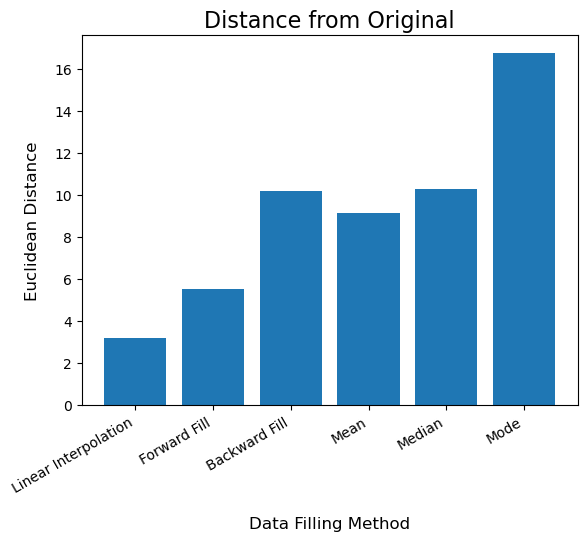

In [14]:
x = list(data.keys())
y = list(data.values())
plt.xlabel('Data Filling Method', labelpad=15, fontdict={'size': 12})
plt.ylabel('Euclidean Distance', labelpad=10, fontdict={'size': 12})
plt.title('Distance from Original', fontdict={'fontsize': 16})
ax = plt.subplot()
plt.bar(x, y)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

In [15]:
# Filling whole dataset using linear interpolation
fullDf = fullDf.interpolate()
if fullDf["LandAvgTemp"].isnull().values.any():
    fullDf = fullDf.fillna(method='bfill')
fullDf

,dt,LandAvgTemp
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573
...,...,...
3187,01-08-2015,14.755
3188,01-09-2015,12.999
3189,01-10-2015,10.801
3190,01-11-2015,7.433


In [16]:
fullDf.columns = ['dt', 'AvgTemp']
fullDf["AvgTemp"] = fullDf["AvgTemp"].round(decimals=3)
fullDf.head(10)

,dt,AvgTemp
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573
5,1750-06-01,12.937
6,1750-07-01,15.868
7,1750-08-01,14.750
8,1750-09-01,11.413
9,1750-10-01,6.367


In [17]:
# converting string to datetime
fullDf["date"] = pd.to_datetime(fullDf["dt"])
fullDf.drop("dt", axis=1, inplace=True)
fullDf.to_csv('./Processed Datasets/globalTemp.csv', sep=',', index=False)